In [6]:
import spectra
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
file_name = 'Data.xlsx'
sheet_name = 'Raman'
df = pd.read_excel(file_name, sheet_name=sheet_name)
# Ensure these colors are valid in Matplotlib.
colors = ['gray', 'red', 'blue', 'green', 'purple']

info_list = []  # List to store the information returned by each iteration

for i, color in zip(range(0, len(df.columns), 2), colors):
    try:
        info = spectra.df_analysis_from_excel(df, position=i)
        info_list.append(info)
    except Exception as e:
        print(f"Error at position {i}: {e}")

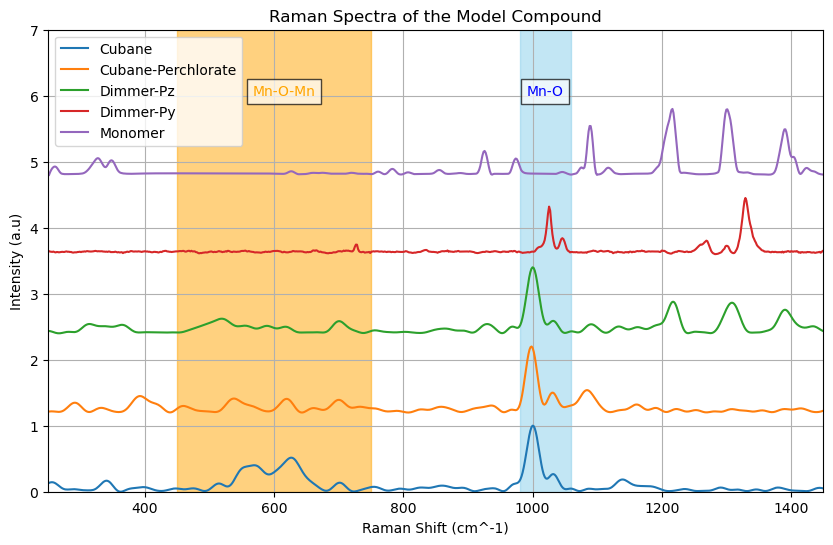

In [ ]:
plt.figure(figsize=(10, 6))
for i, (label, arrays) in enumerate(info_list):
    x, y = arrays
    
    plt.plot(x, y + i * 1.2, label=f"{label}")  # Adding offset to y values


plt.xlabel("Raman Shift (cm^-1)")
plt.ylabel("Intensity (a.u)")
plt.xlim(250, 1450)
plt.ylim(0, 7)
plt.axvspan(970, 1060, color='skyblue', alpha=0.5)
plt.text((970+ 1060) / 2, 6, 'Mn-O', color='blue', ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.axvspan(450, 750, color='orange', alpha=0.5)
plt.text((480 + 750) / 2, 6, 'Mn-O-Mn', color='orange', ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.title("Raman Spectra of the Model Compound")
plt.legend()
plt.grid()
plt.show()